In [51]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [52]:
# 이미지 크기 확인

import os
from PIL import Image

# 이미지가 들어 있는 폴더 경로
folder_path = os.path.expanduser('~/aiffel/rock_scissor_paper/paper')

# 폴더 내 이미지 파일 목록
image_files = [f for f in os.listdir(folder_path) 
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sizes = set()

for img_name in image_files:
    img_path = os.path.join(folder_path, img_name)
    img = Image.open(img_path)
    
    # 이미지 크기 (width, height)
    size = img.size
    sizes.add(size)   
    print(f"{img_name}: {size}")

print("\n📌 전체 이미지 고유 크기 목록:", sizes)

# 만약 크기가 하나만 있다면 → 모든 이미지가 동일 크기
if len(sizes) == 1:
    print(f"➡ 모든 이미지가 동일한 크기 {sizes.pop()} 를 가집니다.")
else:
    print("⚠ 이미지 크기가 서로 다릅니다.")

37.jpg: (28, 28)
22.jpg: (28, 28)
27.jpg: (28, 28)
89.jpg: (28, 28)
21.jpg: (28, 28)
42.jpg: (28, 28)
60.jpg: (28, 28)
24.jpg: (28, 28)
45.jpg: (28, 28)
35.jpg: (28, 28)
9.jpg: (28, 28)
95.jpg: (28, 28)
0.jpg: (28, 28)
66.jpg: (28, 28)
81.jpg: (28, 28)
92.jpg: (28, 28)
96.jpg: (28, 28)
94.jpg: (28, 28)
62.jpg: (28, 28)
12.jpg: (28, 28)
69.jpg: (28, 28)
54.jpg: (28, 28)
25.jpg: (28, 28)
39.jpg: (28, 28)
2.jpg: (28, 28)
63.jpg: (28, 28)
32.jpg: (28, 28)
90.jpg: (28, 28)
43.jpg: (28, 28)
11.jpg: (28, 28)
4.jpg: (28, 28)
6.jpg: (28, 28)
31.jpg: (28, 28)
59.jpg: (28, 28)
56.jpg: (28, 28)
23.jpg: (28, 28)
99.jpg: (28, 28)
17.jpg: (28, 28)
72.jpg: (28, 28)
84.jpg: (28, 28)
52.jpg: (28, 28)
33.jpg: (28, 28)
34.jpg: (28, 28)
65.jpg: (28, 28)
48.jpg: (28, 28)
51.jpg: (28, 28)
15.jpg: (28, 28)
80.jpg: (28, 28)
44.jpg: (28, 28)
13.jpg: (28, 28)
29.jpg: (28, 28)
10.jpg: (28, 28)
1.jpg: (28, 28)
16.jpg: (28, 28)
49.jpg: (28, 28)
47.jpg: (28, 28)
30.jpg: (28, 28)
73.jpg: (28, 28)
82.jpg: (28, 28)
64.

In [53]:
# 데이터 불러오기 + Resize 하기
from PIL import Image 
import glob
import os
print("PIL 라이브러리 import 완료!")


# 1) ⭐가위 이미지를 불러와서 28x28 사이즈로 변경
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")     
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")   
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")


# 2) ⭐바위 이미지를 불러와서 28x28 사이즈로 변경
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")


# 3) ⭐보 이미지를 불러와서 28x28 사이즈로 변경
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [54]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수 생성

import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


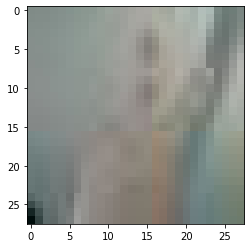

In [55]:
# 이미지 불러오기

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [56]:
# 가위바위보를 인식하는 딥러닝 네트워크 설계

import tensorflow as tf
from tensorflow import keras
import numpy as np

# 하이퍼파라미터 예시
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_61 (Dense)             (None, 3)               

In [81]:
# 딥러닝 네트워크 학습시키기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print(f"train_loss: {train_loss}")
print(f"train_accuracy: {train_accuracy}")

Epoch 1/10
10/10 [==============================] - 1s 37ms/step - loss: 0.0142 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 37ms/step - loss: 0.0126 - accuracy: 0.9967
Epoch 4/10
10/10 [==============================] - 0s 40ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 1s 49ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0195 - accuracy: 0.9933
Epoch 7/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 40ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 1s 52ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 10/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0079 - accuracy: 1.0000
10/10 - 0

In [82]:
# 테스트 데이터 만들기
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [87]:
# 테스트 데이터로 하여 test accuracy를 측정

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 7.8727 - accuracy: 0.3667
test_loss: 7.872679233551025 
test_accuracy: 0.36666667461395264


In [93]:
from tensorflow.keras import layers, models
model = models.Sequential()

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32         #16->32
n_channel_2=64         #32->64
n_dense=128             #32->128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(layers.BatchNormalization())     #BatchNormalization 적용 (학습 안정화)
# model.add(layers.Dropout(0.5))             #Dropout 적용 (과적합 방지)
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_77 (Dense)             (None, 3)               